<div style="text-align: center;">
<h1>D207 Performance Assessment</h1>
    <H3><i>Which independent variables are most impactful to churn?</i></H3>
</div>
<hr>
<p><b>Tyson Biegler</b></p>
<p>Student ID: <b><i>012170282</b></i></p>
<p>D207 - Exploratory Data Analysis</p>
<p>Date: --/--/2024</p>
<br>
<p>Western Governors University</p>
<p>School of Technology, College of IT</p>
<p>Master of Science, Data Analytics</p>




# A Describing the situation
### A1. Research question
I want to discover <b>"which independant variables are most impactful to churn."</b>
### A2. Benefits of analysis
In the telecom industry, or any service industry for that matter, customers are the business. Customer service is essential to a thriving business.

The data dictionary mentions that some telecom companies can experience a 25% churn rate, and therefore, investigating the factors that contribute to customer churn is of utmost importance. If stakeholders knew precisely which factors contributed to churn, based on statistical analysis, they would have data-driven insights that would enable them to make meaningful changes for their customers. Some of these insights could lead to adjusting pricing, offering incentives based on tenure, increase training in customer interactions, focus more or less on different demographics and so on. 

### A3. Identification of the data
Because we will be investigating which factors impact customer churn, the dependant variable will be 'Churn.' 'Churn' is a categorical variable that consists of 'Yes' and 'No' values.

<p style="color: red;"><b>.... Add more variables here</b></p>
children
area
age
income
marital
gender
outage_sec
email
contacts
yearly_equip
Techie
Contract
Port_modem
Tablet
InternetService
Phone
Multiple
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
PaymentMethod
Tenure
MonthlyCharge
Bandwidth_GB_Year



Lastly, I will be using the survey response data. These survey responses are ordinal categorical data that consist of score ratings from one to eight (1 = most important, 8 = least important). 


In [1]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None #So that I can see all the columns
import statistics
from scipy import stats
import pylab as pl
import statsmodels.api as sm
import seaborn as sns

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [2]:
# importing csv
df = pd.read_csv('C:/Users/tyson/Documents/GitHub/WGU_MSDA_Portfolio/Exploratory Data Analysis - D207/Raw/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
#renaming the survey responses to be more intuitive
df.rename(columns={'Item1':'Timely_response',
                   'Item2':'Timely_fixes',
                   'Item3':'Timely_replacements',
                   'Item4':'Reliability',
                   'Item5':'Options',
                   'Item6':'Respectful',
                   'Item7':'Courteous',
                   'Item8':'Active_listening'
                   },
          inplace=True)

df.columns[-8:] #making sure they were all changed correctly

Index(['Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability',
       'Options', 'Respectful', 'Courteous', 'Active_listening'],
      dtype='object')

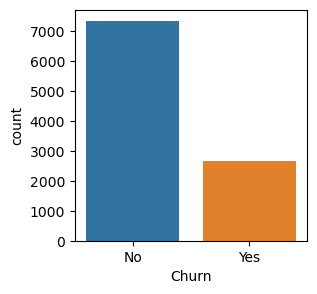

In [5]:
plt.figure(figsize=(3,3))
churn = sns.countplot(x=df['Churn'], linewidth=1)
plt.show()

In [6]:
#selecting the numerical independant variables
num_ind_variables = [
    'Children','Age', 'Income','Outage_sec_perweek', 
    'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response','Timely_fixes',
    'Timely_replacements','Reliability','Options','Respectful','Courteous','Active_listening'
]

#selecting the categorical independant variables
cat_ind_variables = [
    'Area','Marital', 'Gender','Techie', 'Contract', 'Port_modem', 
    'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'PaymentMethod'
]

# Filtering only the selected independent variables
df_num_ind_variables = df[num_ind_variables]
df_cat_ind_variables = df[cat_ind_variables]

df_num_ind_variables.head()
df_cat_ind_variables.head()



,Area,Marital,Gender,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Urban,Widowed,Male,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic)
1,Urban,Married,Female,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic)
2,Urban,Widowed,Female,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic)
3,Suburban,Married,Male,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check
4,Suburban,Separated,Male,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check


In [7]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful',
       'Courteous', 'Active_listening'],
      dtype='object')

.

<h2>Tests to use</h2> <b>source<b>: 
<a href="https://www.youtube.com/watch?v=I10q6fjPxJ0">Greg Martin</a>


|             | **Test**    | **H0**    | **H1**    | **p value**    | **Result**    |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **One Categorical** | 1 sample proportion test | H0 no difference | H1 there is a difference | p < .05 alpha value, reject H0 | difference is stat. significant |
| **Two Categorical** | chi squared | M/F independant of Age | M/F dependant on Age | p < .05 alpha value, reject H0| observation is stat. significant |
| **One Numeric** | t-test | avg. height not different | avg height diff. from historic height  | p < .05 alpha value, reject H0| difference is stat. significant |
| **One Numeric and One Categorical** | t-test or ANOVA | M/F no diffrence in height | M/F difference in height | p < .05 alpha value, reject H0| difference is stat. significant |
| **Two Numeric** | correlation test | no difference between weight and height | there is a relationship between weight and height | p < .05 alpha value, reject H0| difference is stat. significant |



<hr>

.

In [ ]:
#what others have used
monthlyyu, basndwhith, timelyresponse, courteious, | reliability, 

In [ ]:
# Exporting to CSV
df.to_csv('C:/Users/tyson/Documents/GitHub/WGU_MSDA_Portfolio/D207/Cleaned/D207PA.csv', index=False)

.

.

In [8]:
df_num_ind_variables.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability',
       'Options', 'Respectful', 'Courteous', 'Active_listening'],
      dtype='object')

In [9]:
df_cat_ind_variables.columns

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

<hr>

<center><h1> Just for reference </h1></center>

In [ ]:
# T-test in python

#sample data witha population size of 7
N = 7
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

# calculating the standard deviation
#calculate the variance to get the standard deviation
# for unbiased max liklihood estimate we have to divede the var by N-1
var_a = statistics.variance(a) #calculating variance to get std dev
var_b = statistics.variance(b)
s = np.sqrt((var_a + var_b)/2)#standard deviation

print('The mean of a is: ', statistics.mean(a))
print('The mean of b is: ', statistics.mean(b))


# calculate the t statistic
t = (statistics.mean(a) - statistics.mean(b)) / (s * np.sqrt(2/N))

# compare with the critical t-value
#degrees of freedom
df = (2*N) - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t, df=df)

print("t = " + str(t))
print("p = " + str(2 * p))

# you can see that after comparing the t statistic with the critical t value (computed internally)
# cross checking with the internal scipy function

# t2, p2 = stats.ttest_ind(a, b)
# print("t = " + str(t2))
# print("p = " + str(p2))



In [ ]:
# Q-Q plot in python
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

stats.probplot(a, dist="norm", plot=pl)
pl.show()
stats.probplot(b, dist="norm", plot=pl)
pl.show()

In [ ]:
# Density plot in Python
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

#seaborn histogram
sns.kdeplot(a, fill=True, linewidth=3, label='a')
sns.kdeplot(b, fill=True, linewidth=3, label='b')

#add labels
plt.title('Density Plot of a, b')
plt.xlabel('Range of Values')
plt.ylabel('Freq.')

#add legend
plt.legend(['a', 'b'])


In [ ]:
#Heatmap for corelation

sns.heatmap(df.corr(), vmin=-1, vmax=1, Cmap = sns.diverging_palette(10,400,as_cmap=True))

In [12]:
# Step 4: Create a list to store the results
results = []

# Step 5: Perform t-tests for numerical variables
for col in num_ind_variables:
    # Split data into groups based on churn status
    churn_yes = df[df['Churn'] == 'Yes'][col]
    churn_no = df[df['Churn'] == 'No'][col]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(churn_yes, churn_no, nan_policy='omit')
    
    # Save the results
    results.append({'Variable': col, 'Test': 'T-Test', 'P-Value': p_value})

# Step 6: Perform Chi-Square tests for categorical variables
for col in cat_ind_variables:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Churn'], df[col])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Save the results
    results.append({'Variable': col, 'Test': 'Chi-Square', 'P-Value': p})

# Step 7: Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 8: Sort results by p-value to find the most significant variables
results_df = results_df.sort_values(by='P-Value')

# Step 9: Print the results
print(results_df)

                Variable        Test        P-Value
7                 Tenure      T-Test   0.000000e+00
8          MonthlyCharge      T-Test   0.000000e+00
9      Bandwidth_GB_Year      T-Test   0.000000e+00
33       StreamingMovies  Chi-Square  1.078010e-183
22              Contract  Chi-Square  9.116348e-157
32           StreamingTV  Chi-Square  5.549381e-117
27              Multiple  Chi-Square   1.605732e-39
25       InternetService  Chi-Square   3.045199e-17
21                Techie  Chi-Square   3.096716e-11
30      DeviceProtection  Chi-Square   1.843103e-08
29          OnlineBackup  Chi-Square   4.954241e-07
26                 Phone  Chi-Square   9.577997e-03
20                Gender  Chi-Square   1.944758e-02
35         PaymentMethod  Chi-Square   2.400702e-02
31           TechSupport  Chi-Square   6.282377e-02
6   Yearly_equip_failure      T-Test   1.112466e-01
14               Options      T-Test   1.624210e-01
28        OnlineSecurity  Chi-Square   1.834130e-01
11          

In [11]:
results = []

# Function to perform t-test
def perform_t_test(group1, group2):
    N = len(group1)  # Population size
    mean_a = statistics.mean(group1)
    mean_b = statistics.mean(group2)
    
    # Calculate variance to get standard deviation
    var_a = statistics.variance(group1)
    var_b = statistics.variance(group2)
    s = np.sqrt((var_a + var_b) / 2)  # Standard deviation
    
    # Calculate the t statistic
    t = (mean_a - mean_b) / (s * np.sqrt(2 / N))
    
    # Degrees of freedom
    df = (2 * N) - 2
    
    # P-value after comparison with the t
    p = 1 - stats.t.cdf(t, df=df)
    
    # Since it's a two-tailed test
    p_value = 2 * p
    
    return t, p_value

# Perform t-test for each numerical variable
for col in num_ind_variables:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()
    
    # Perform the t-test
    t_stat, p_value = perform_t_test(churn_yes, churn_no)
    
    # Store the result
    results.append({'Variable': col, 'Test': 'T-Test', 'P-Value': p_value})

# Convert results to DataFrame and sort by p-value
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P-Value')

# Display the results
print(results_df)


                Variable    Test   P-Value
8          MonthlyCharge  T-Test  0.000000
4                  Email  T-Test  0.308495
5               Contacts  T-Test  0.480093
2                 Income  T-Test  0.626054
17      Active_listening  T-Test  0.642191
1                    Age  T-Test  0.642511
15            Respectful  T-Test  0.926012
3     Outage_sec_perweek  T-Test  1.010298
13           Reliability  T-Test  1.220798
0               Children  T-Test  1.276591
10       Timely_response  T-Test  1.453230
16             Courteous  T-Test  1.533504
12   Timely_replacements  T-Test  1.640100
11          Timely_fixes  T-Test  1.725276
14               Options  T-Test  1.750254
6   Yearly_equip_failure  T-Test  1.817394
7                 Tenure  T-Test  2.000000
9      Bandwidth_GB_Year  T-Test  2.000000


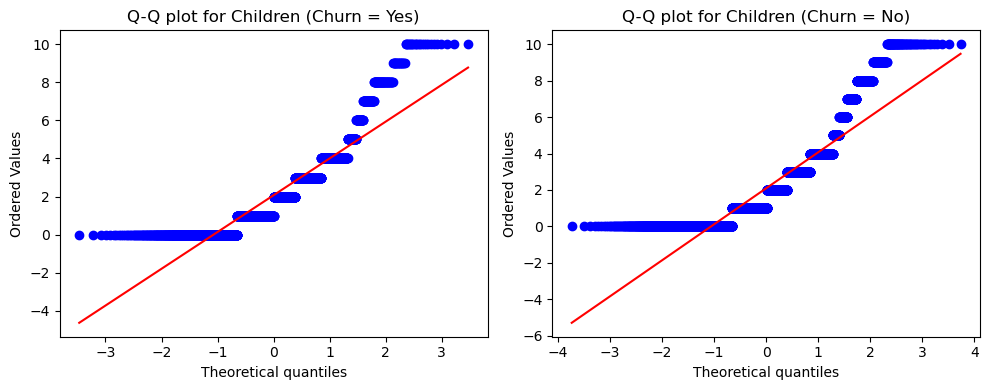

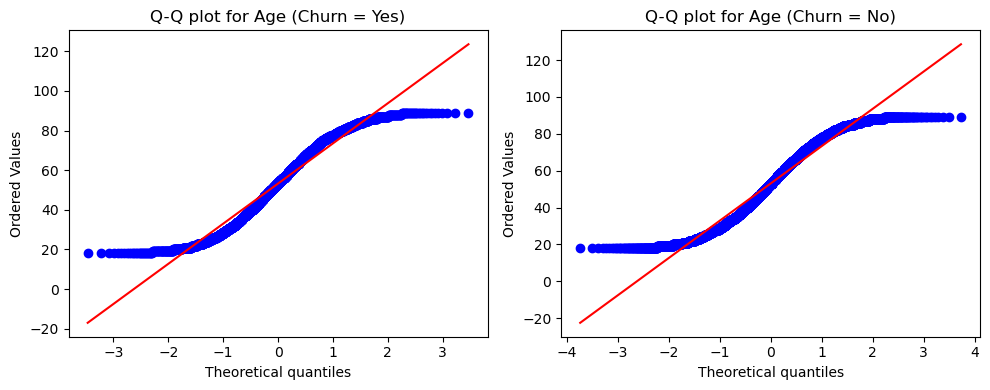

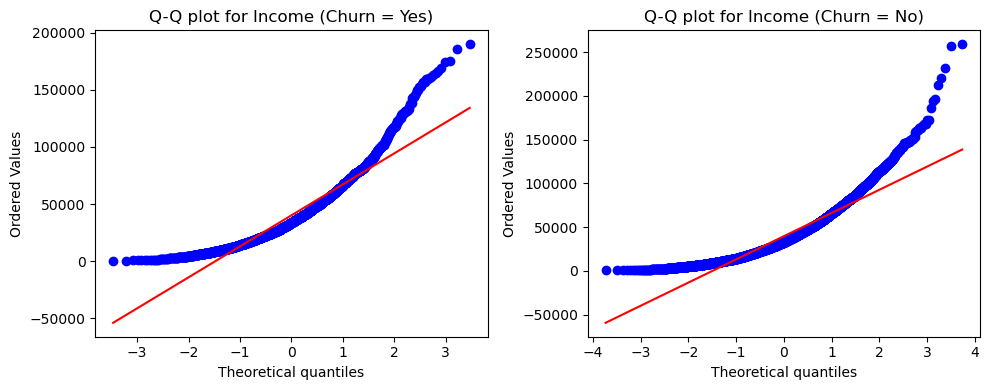

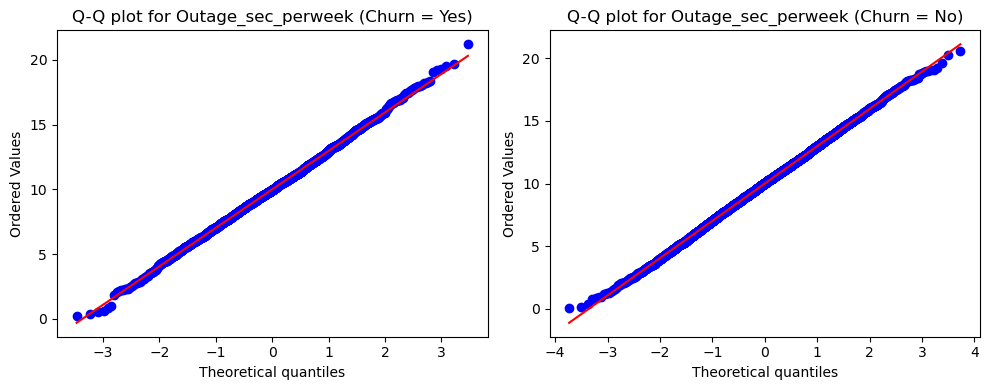

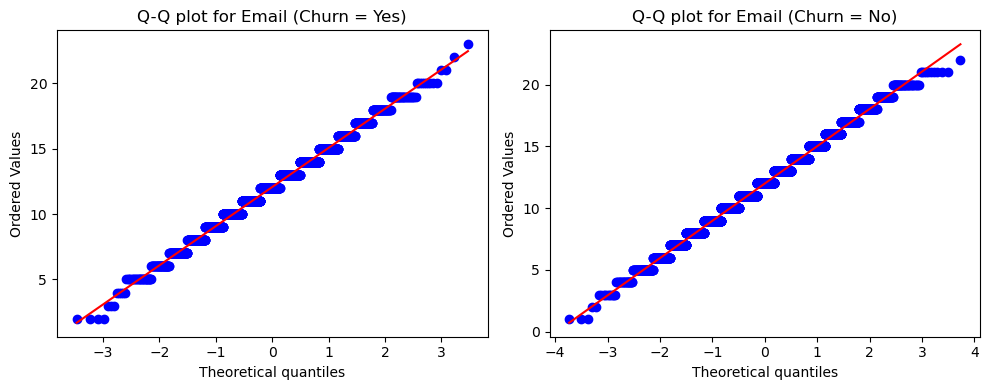

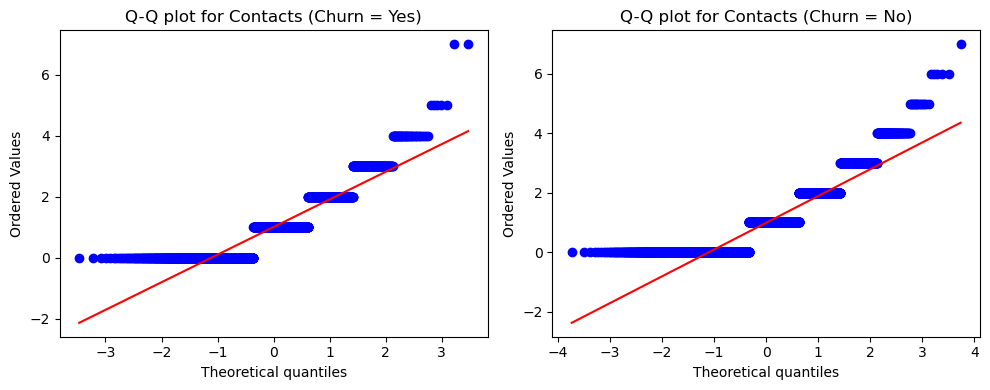

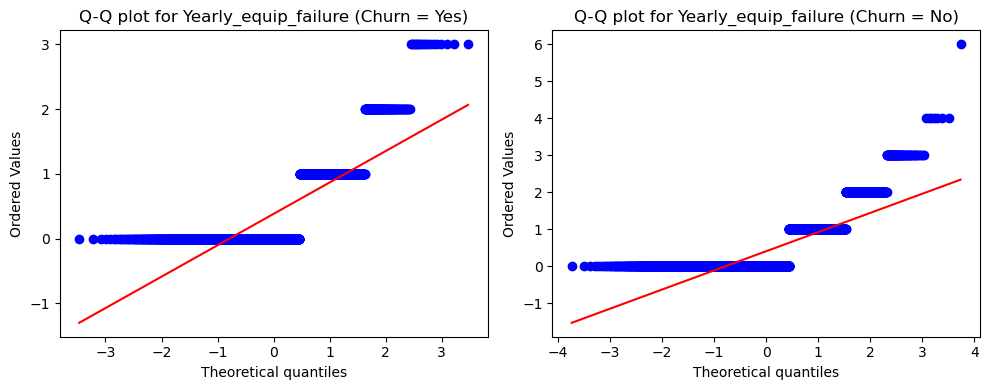

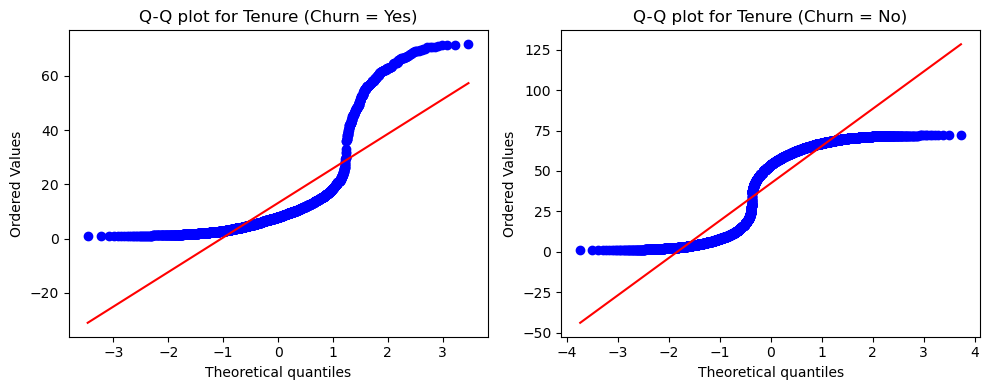

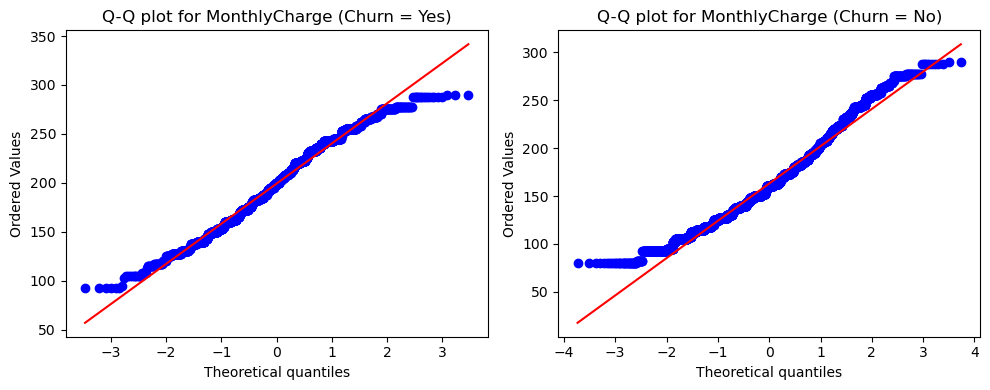

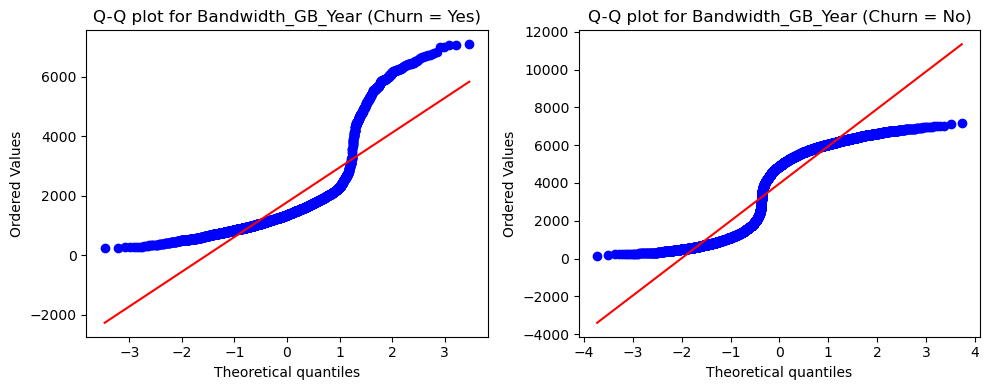

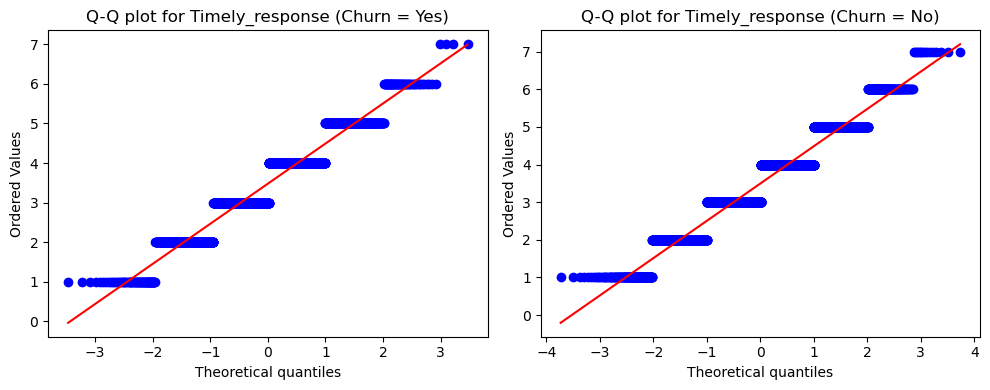

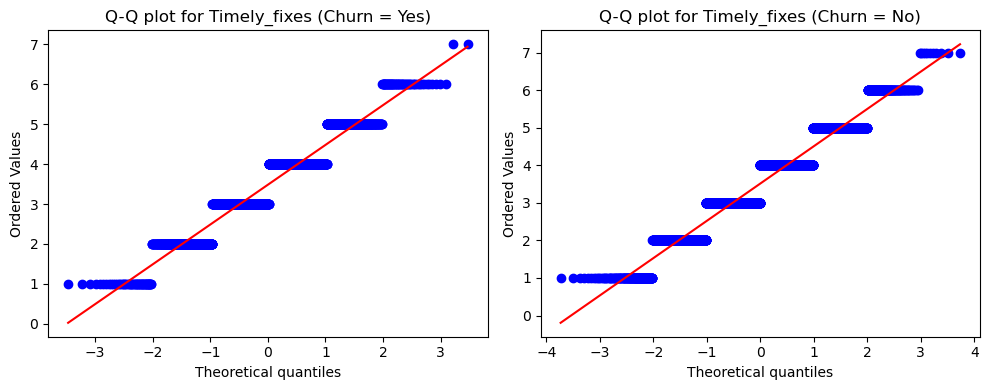

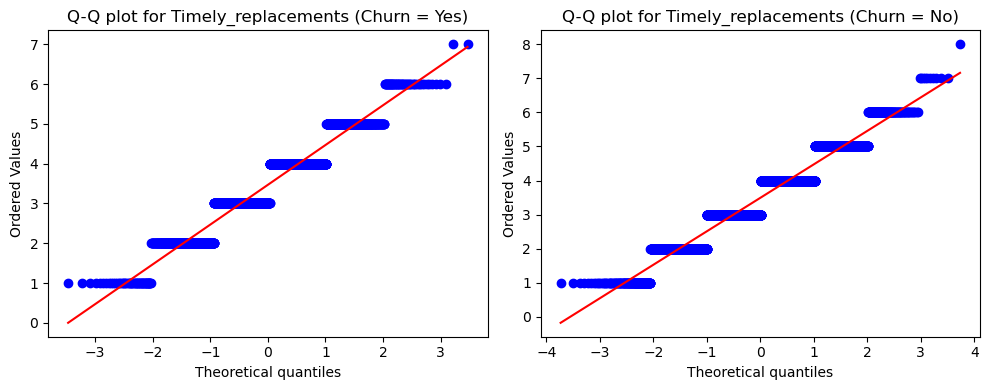

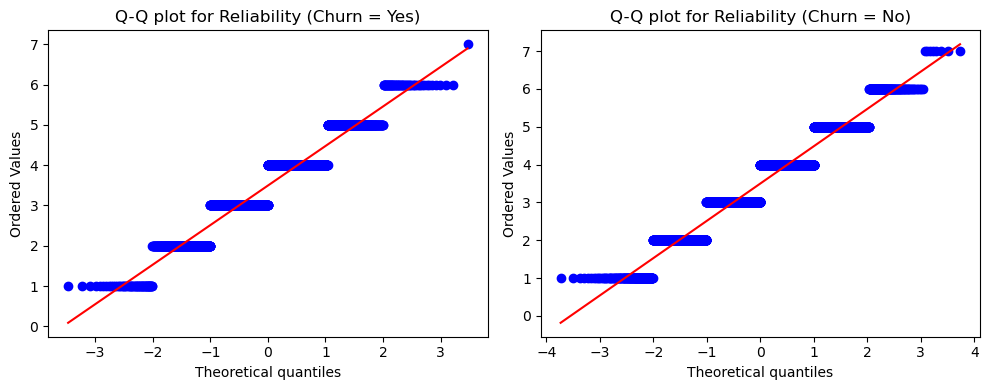

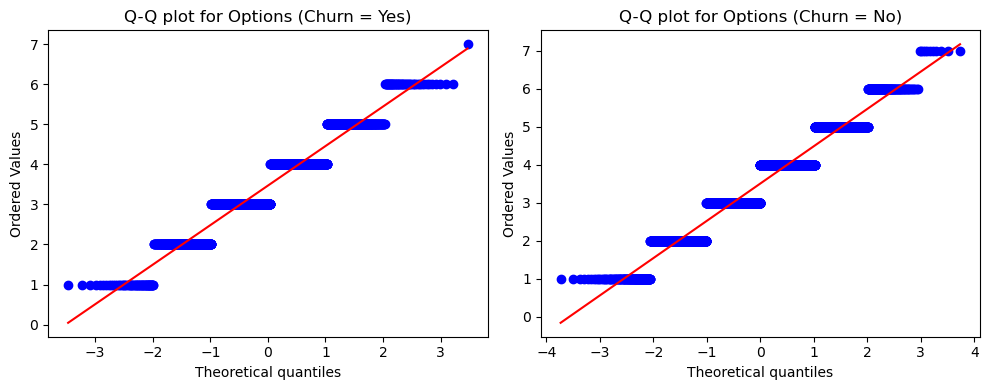

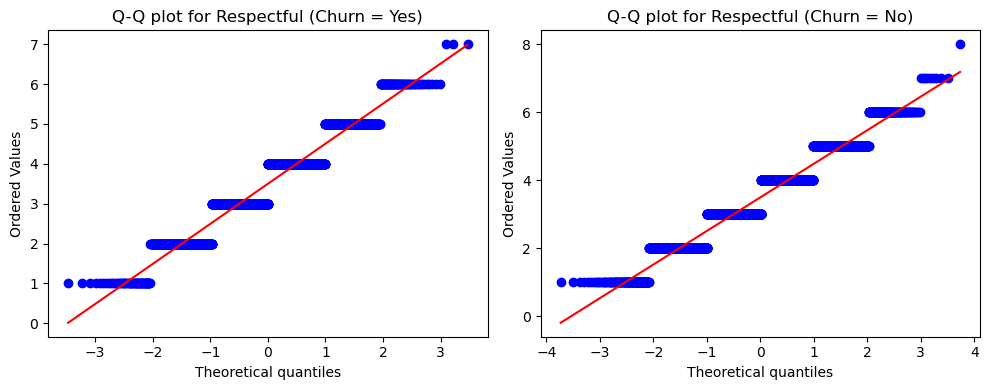

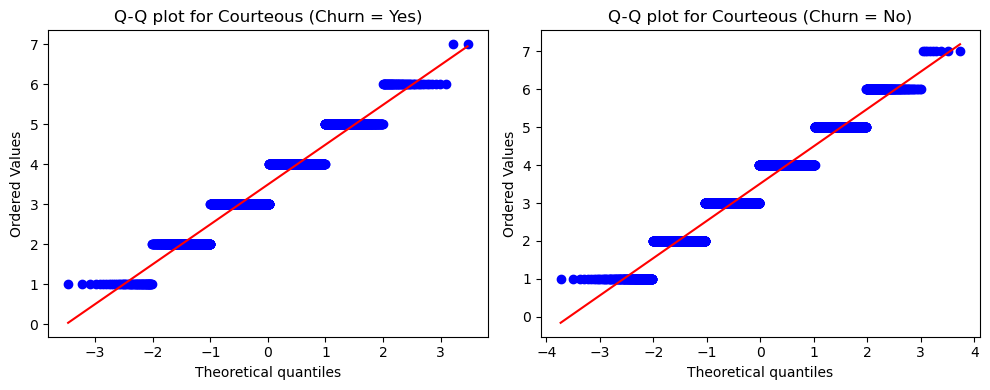

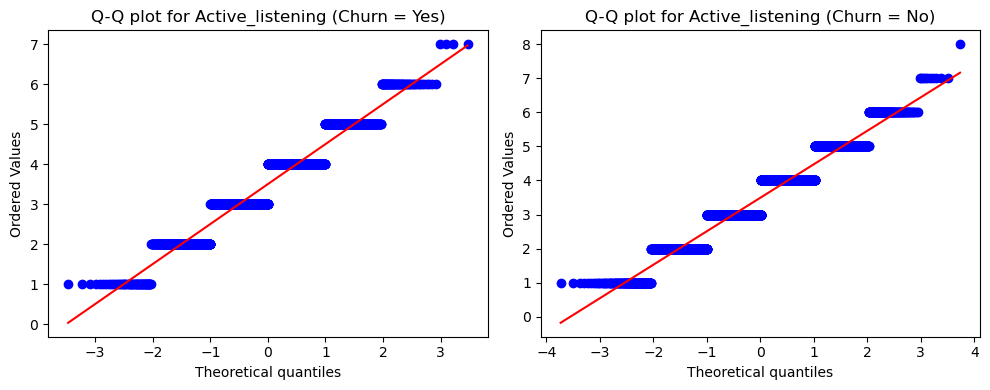

                Variable    Test   P-Value
8          MonthlyCharge  T-Test  0.000000
4                  Email  T-Test  0.308495
5               Contacts  T-Test  0.480093
2                 Income  T-Test  0.626054
17      Active_listening  T-Test  0.642191
1                    Age  T-Test  0.642511
15            Respectful  T-Test  0.926012
3     Outage_sec_perweek  T-Test  1.010298
13           Reliability  T-Test  1.220798
0               Children  T-Test  1.276591
10       Timely_response  T-Test  1.453230
16             Courteous  T-Test  1.533504
12   Timely_replacements  T-Test  1.640100
11          Timely_fixes  T-Test  1.725276
14               Options  T-Test  1.750254
6   Yearly_equip_failure  T-Test  1.817394
7                 Tenure  T-Test  2.000000
9      Bandwidth_GB_Year  T-Test  2.000000


In [13]:
# List to store results
results = []

# Function to perform t-test
def perform_t_test(group1, group2):
    N = len(group1)  # Population size
    mean_a = statistics.mean(group1)
    mean_b = statistics.mean(group2)
    
    # Calculate variance to get standard deviation
    var_a = statistics.variance(group1)
    var_b = statistics.variance(group2)
    s = np.sqrt((var_a + var_b) / 2)  # Standard deviation
    
    # Calculate the t statistic
    t = (mean_a - mean_b) / (s * np.sqrt(2 / N))
    
    # Degrees of freedom
    df = (2 * N) - 2
    
    # P-value after comparison with the t
    p = 1 - stats.t.cdf(t, df=df)
    
    # Since it's a two-tailed test
    p_value = 2 * p
    
    return t, p_value

# Perform t-test for each numerical variable
for col in num_ind_variables:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()
    
    # Perform the t-test
    t_stat, p_value = perform_t_test(churn_yes, churn_no)
    
    # Store the result
    results.append({'Variable': col, 'Test': 'T-Test', 'P-Value': p_value})
    
    # Plot Q-Q plots for normality check
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    stats.probplot(churn_yes, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {col} (Churn = Yes)')

    plt.subplot(1, 2, 2)
    stats.probplot(churn_no, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {col} (Churn = No)')

    plt.tight_layout()
    plt.show()

# Convert results to DataFrame and sort by p-value
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P-Value')

# Display the results
print(results_df)

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


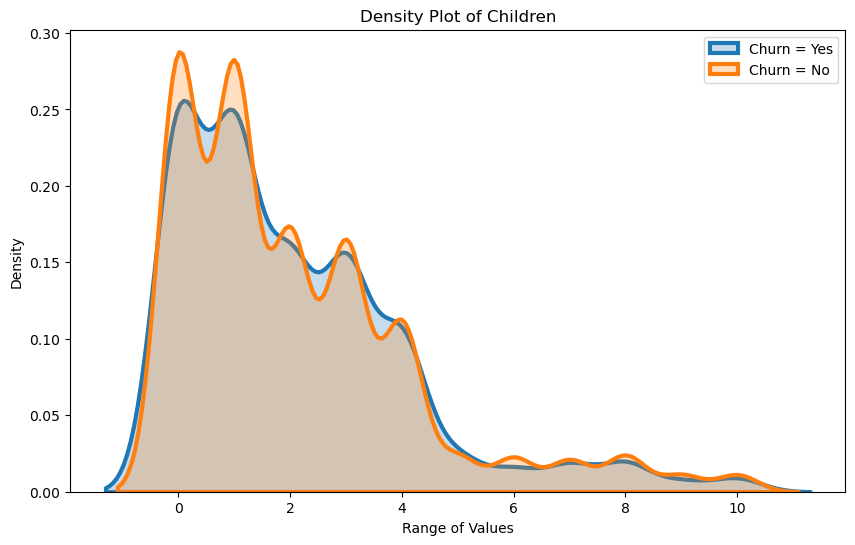

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


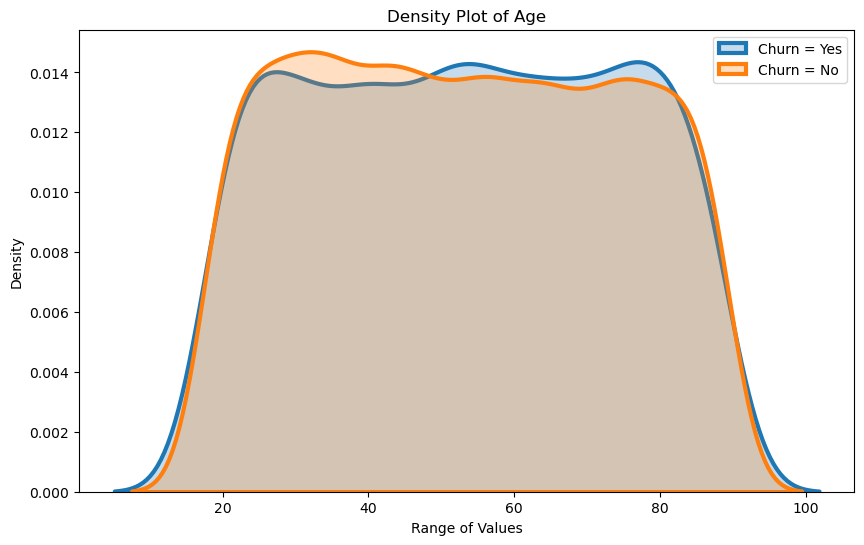

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


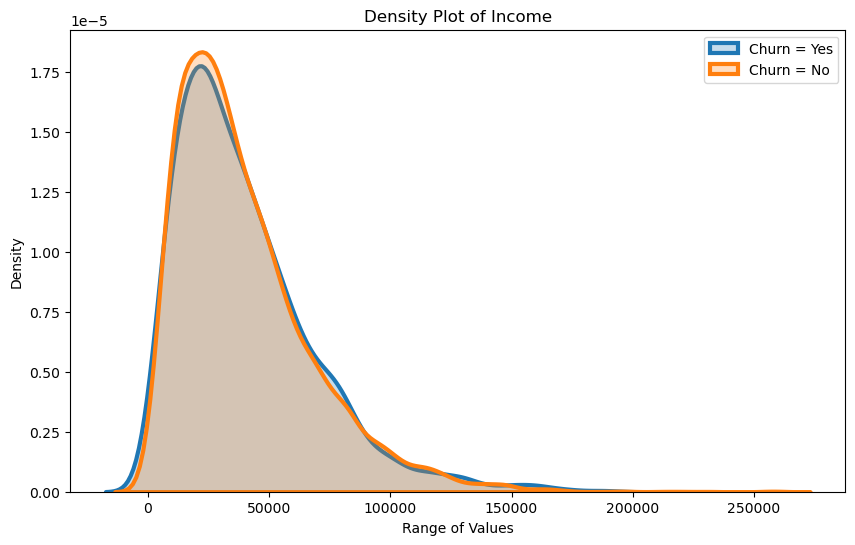

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


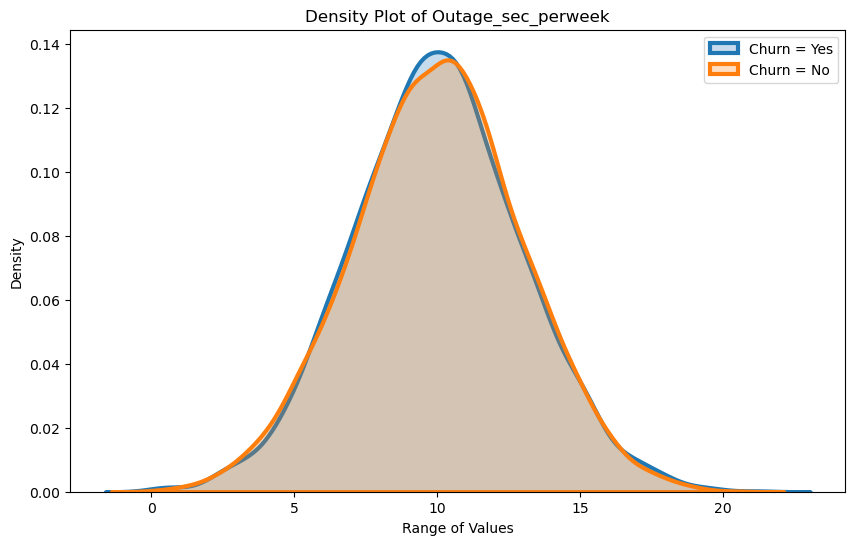

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


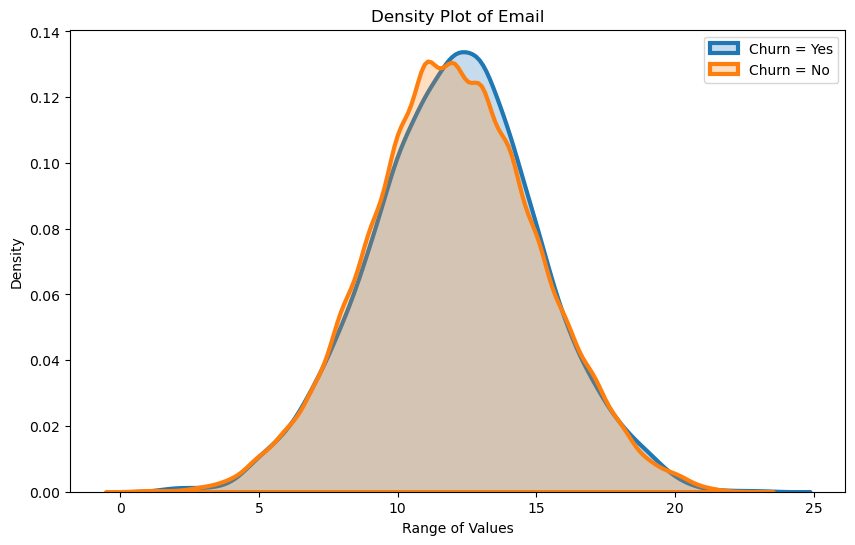

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


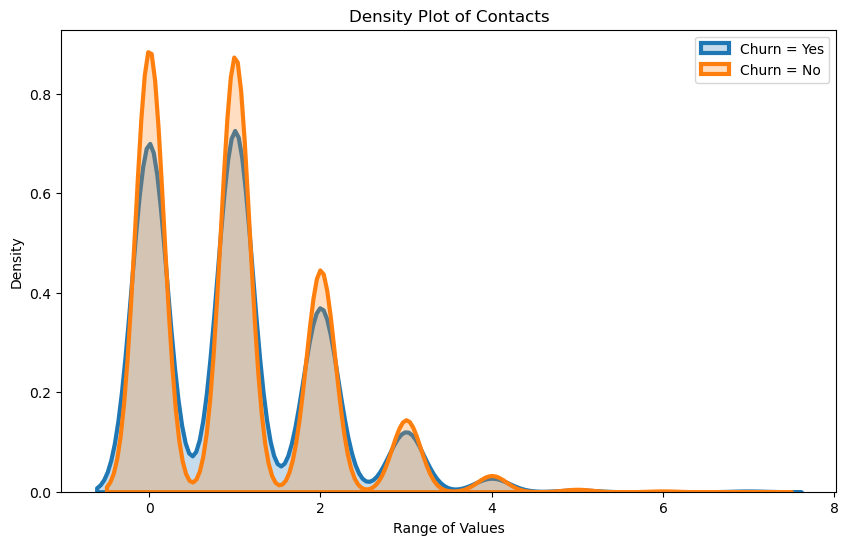

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


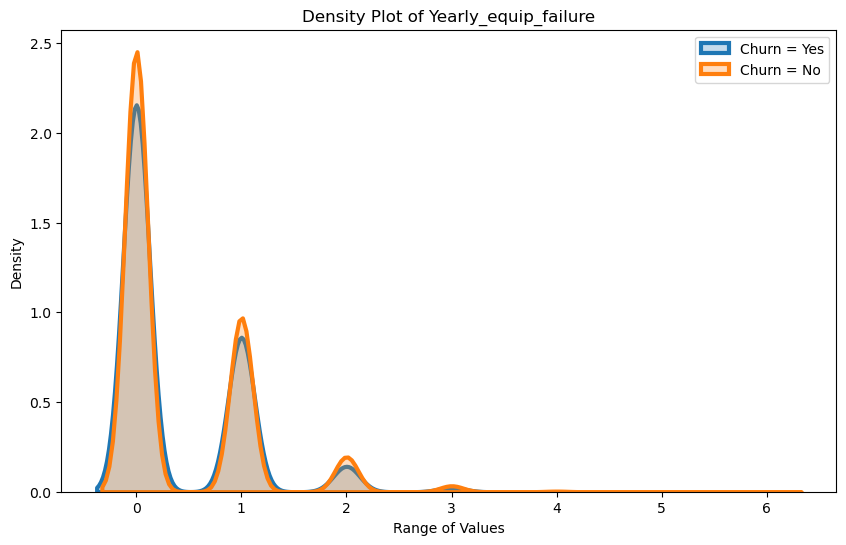

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


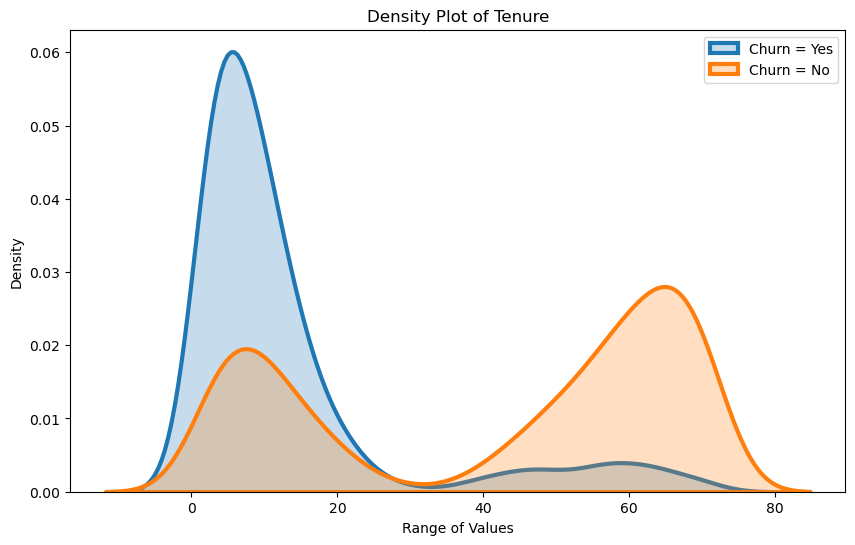

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


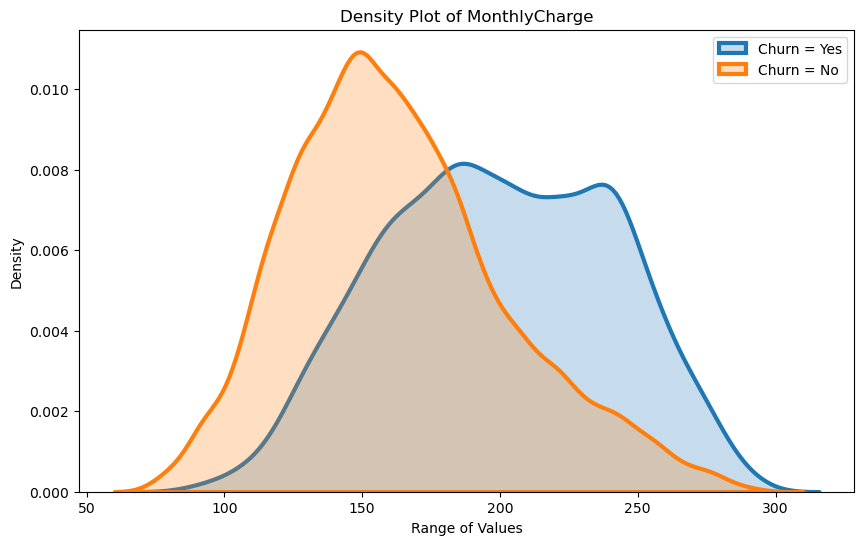

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


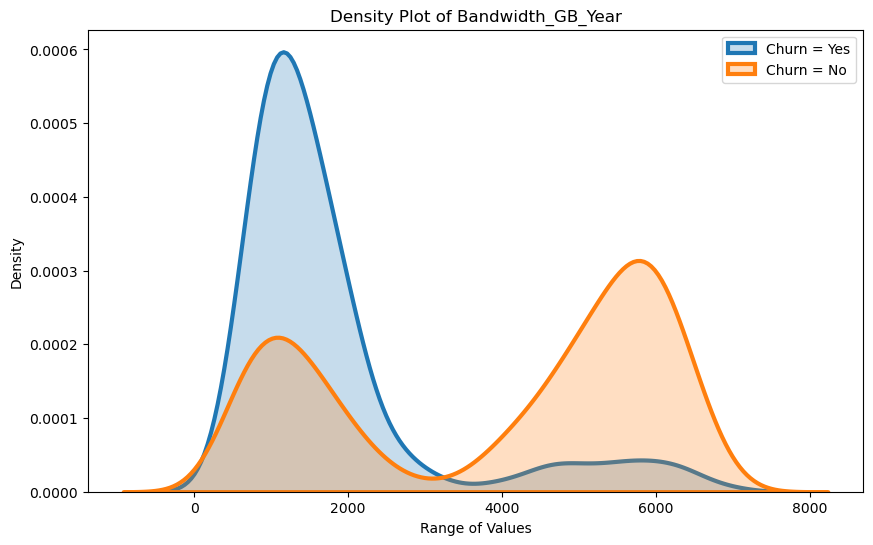

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


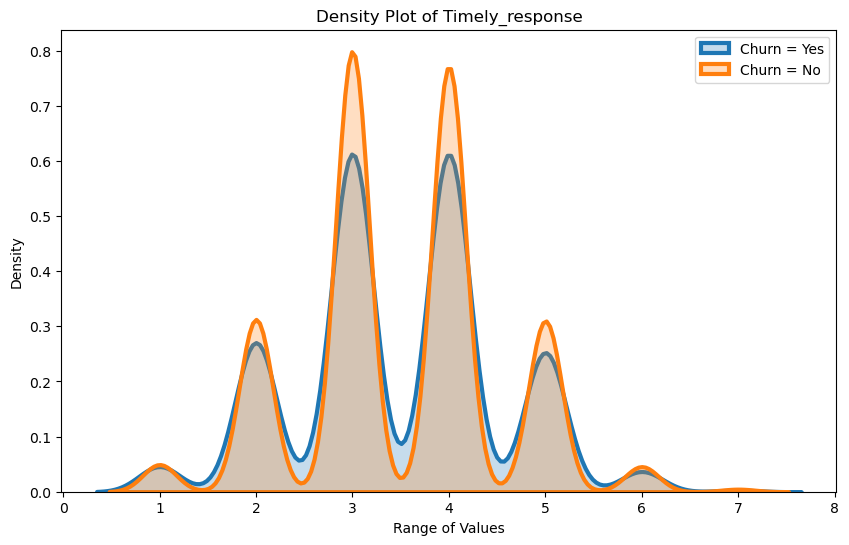

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


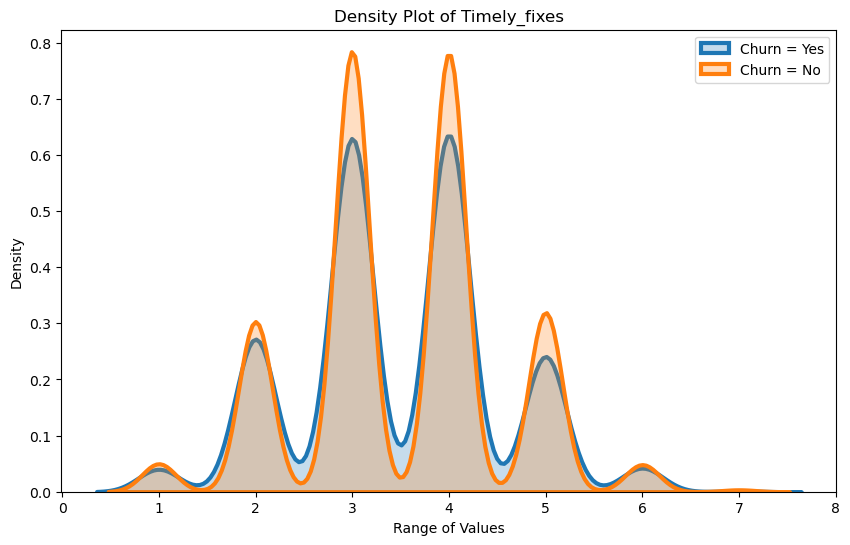

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


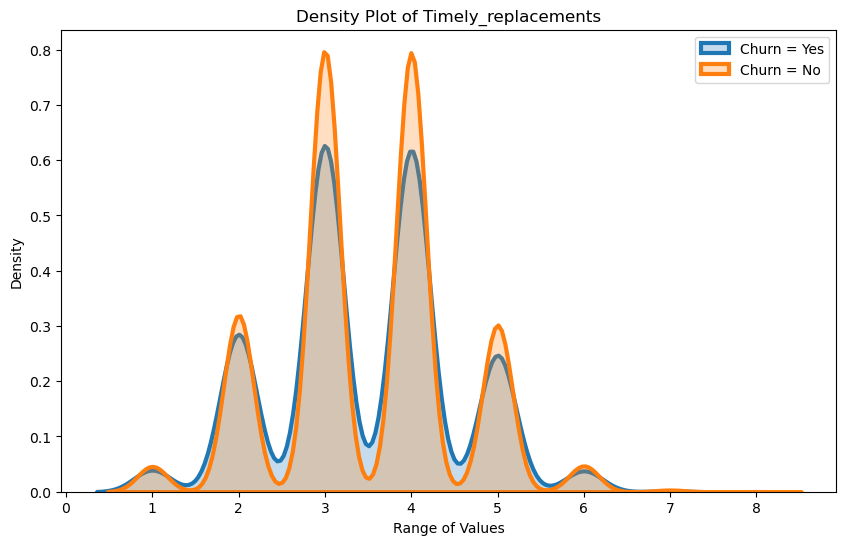

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


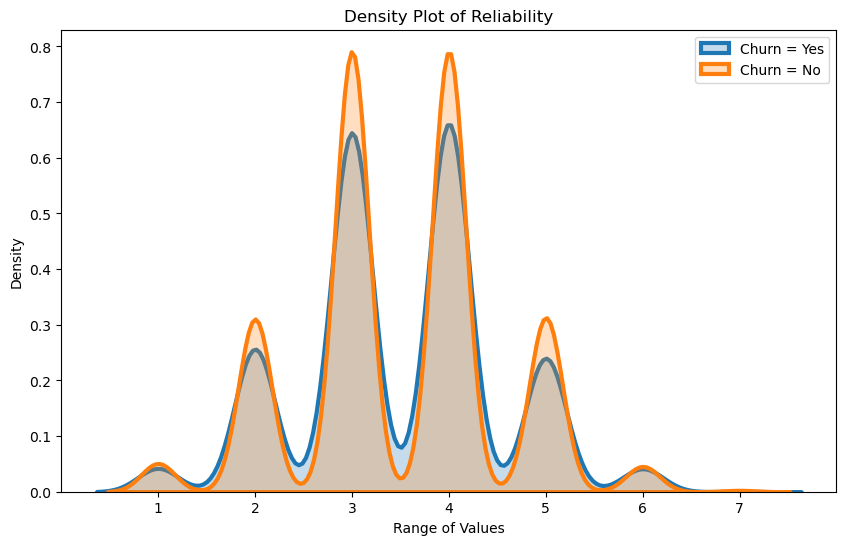

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


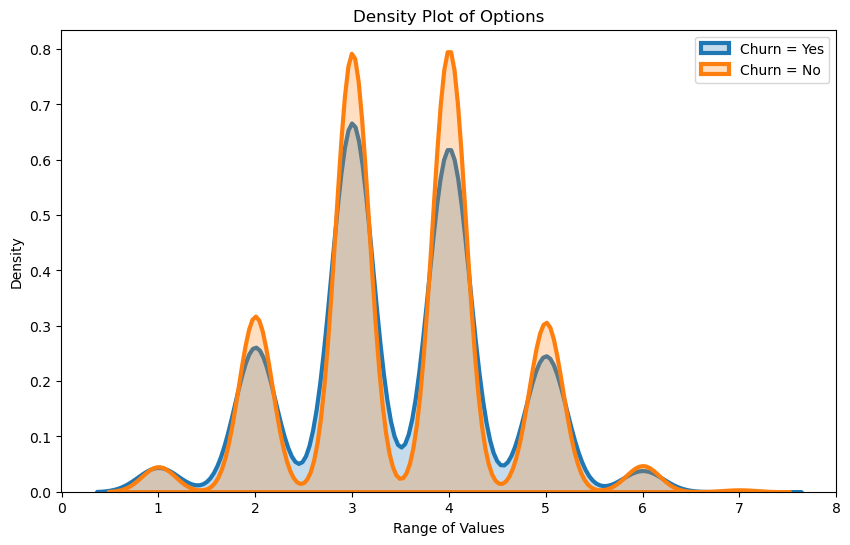

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


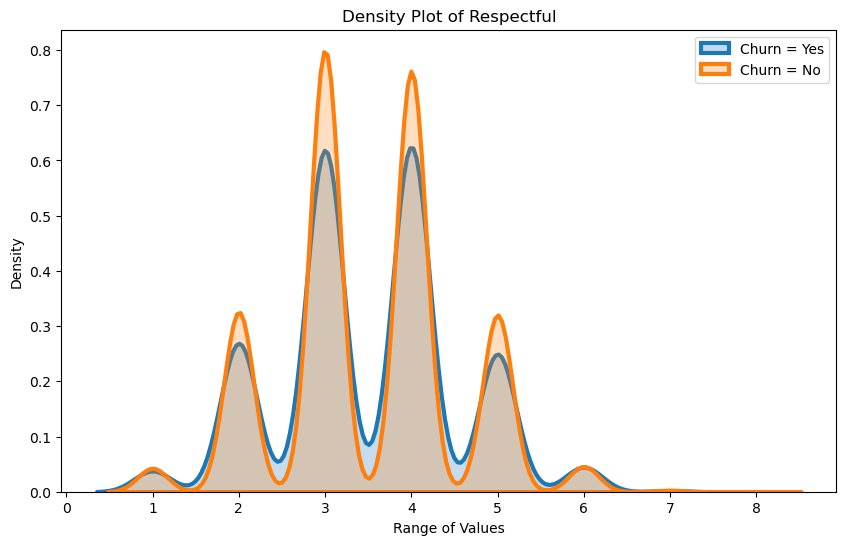

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


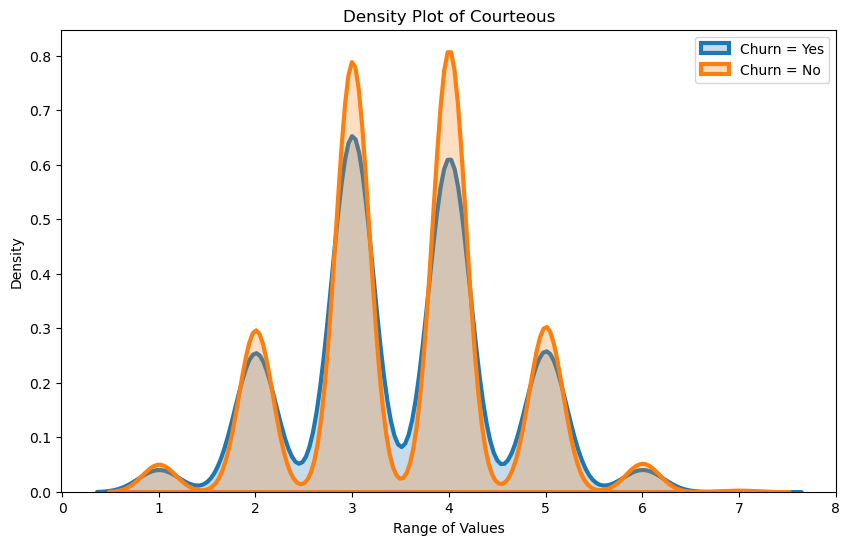

C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


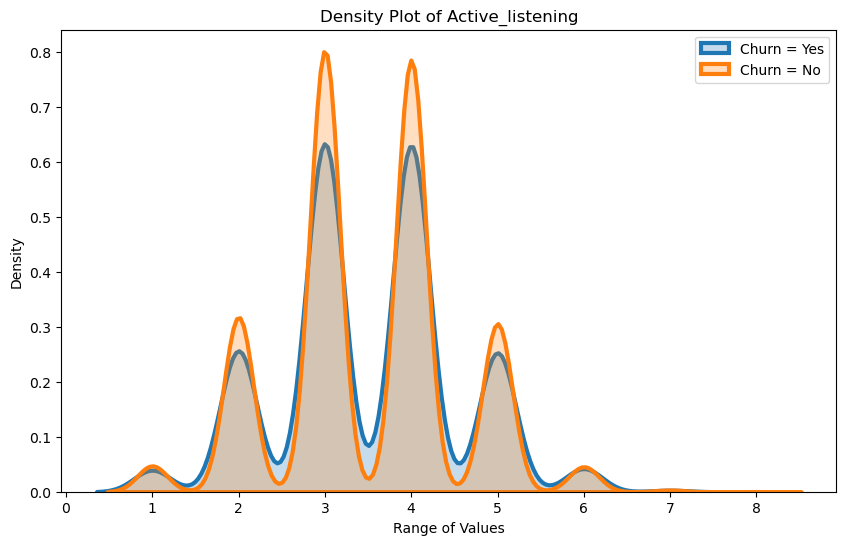

                Variable    Test   P-Value
8          MonthlyCharge  T-Test  0.000000
4                  Email  T-Test  0.308495
5               Contacts  T-Test  0.480093
2                 Income  T-Test  0.626054
17      Active_listening  T-Test  0.642191
1                    Age  T-Test  0.642511
15            Respectful  T-Test  0.926012
3     Outage_sec_perweek  T-Test  1.010298
13           Reliability  T-Test  1.220798
0               Children  T-Test  1.276591
10       Timely_response  T-Test  1.453230
16             Courteous  T-Test  1.533504
12   Timely_replacements  T-Test  1.640100
11          Timely_fixes  T-Test  1.725276
14               Options  T-Test  1.750254
6   Yearly_equip_failure  T-Test  1.817394
7                 Tenure  T-Test  2.000000
9      Bandwidth_GB_Year  T-Test  2.000000


In [14]:
results = []

# Function to perform t-test
def perform_t_test(group1, group2):
    N = len(group1)  # Population size
    mean_a = statistics.mean(group1)
    mean_b = statistics.mean(group2)
    
    # Calculate variance to get standard deviation
    var_a = statistics.variance(group1)
    var_b = statistics.variance(group2)
    s = np.sqrt((var_a + var_b) / 2)  # Standard deviation
    
    # Calculate the t statistic
    t = (mean_a - mean_b) / (s * np.sqrt(2 / N))
    
    # Degrees of freedom
    df = (2 * N) - 2
    
    # P-value after comparison with the t
    p = 1 - stats.t.cdf(t, df=df)
    
    # Since it's a two-tailed test
    p_value = 2 * p
    
    return t, p_value

# Perform t-test for each numerical variable
for col in num_ind_variables:
    churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
    churn_no = df[df['Churn'] == 'No'][col].dropna()
    
    # Perform the t-test
    t_stat, p_value = perform_t_test(churn_yes, churn_no)
    
    # Store the result
    results.append({'Variable': col, 'Test': 'T-Test', 'P-Value': p_value})
    
    # Plot density plots for distribution comparison
    plt.figure(figsize=(10, 6))
    sns.kdeplot(churn_yes, fill=True, linewidth=3, label='Churn = Yes')
    sns.kdeplot(churn_no, fill=True, linewidth=3, label='Churn = No')
    
    # Add labels and title
    plt.title(f'Density Plot of {col}')
    plt.xlabel('Range of Values')
    plt.ylabel('Density')
    
    # Add legend
    plt.legend()
    plt.show()

# Convert results to DataFrame and sort by p-value
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='P-Value')

# Display the results
print(results_df)